## Case Study: Prediction of Loan Approval Prediction

Our new online bank seeks to automate (in real time) the loan qualifying procedure based on information given by customers while filling out an online application form. <br>
The data scientist team is approached to develop ML models that can help the company predict loan approval in accelerating decision-making process for determining whether an applicant is eligible for a loan or not. <br>

The following is the structure of the data set.<br>

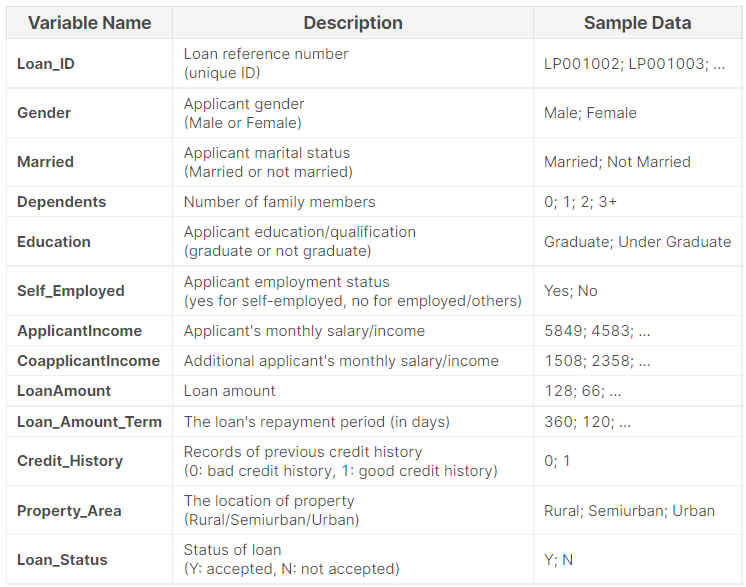

### Loading Libraries and Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn import svm
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/loan_prediction.csv')
df = df.drop(columns='Loan_ID')
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [4]:
# Change label for target column
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
# Check spread of unique values in Loan Status
df['Loan_Status'].value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

In [5]:
# Initial correlation heatmap
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<AxesSubplot:>

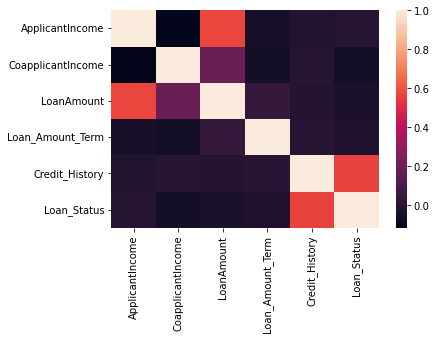

In [6]:
sns.heatmap(df.corr())

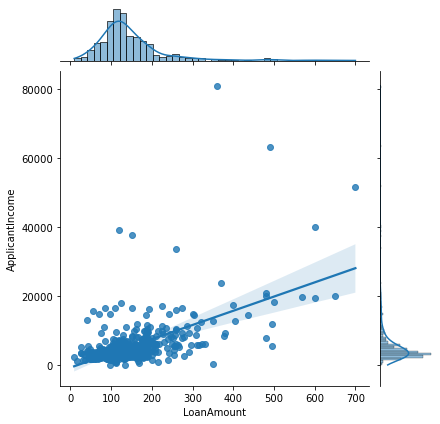

In [7]:
# Check correlation between Loan Amount & Applicant Income
sns.jointplot(x='LoanAmount', y='ApplicantIncome', data=df, kind='reg')

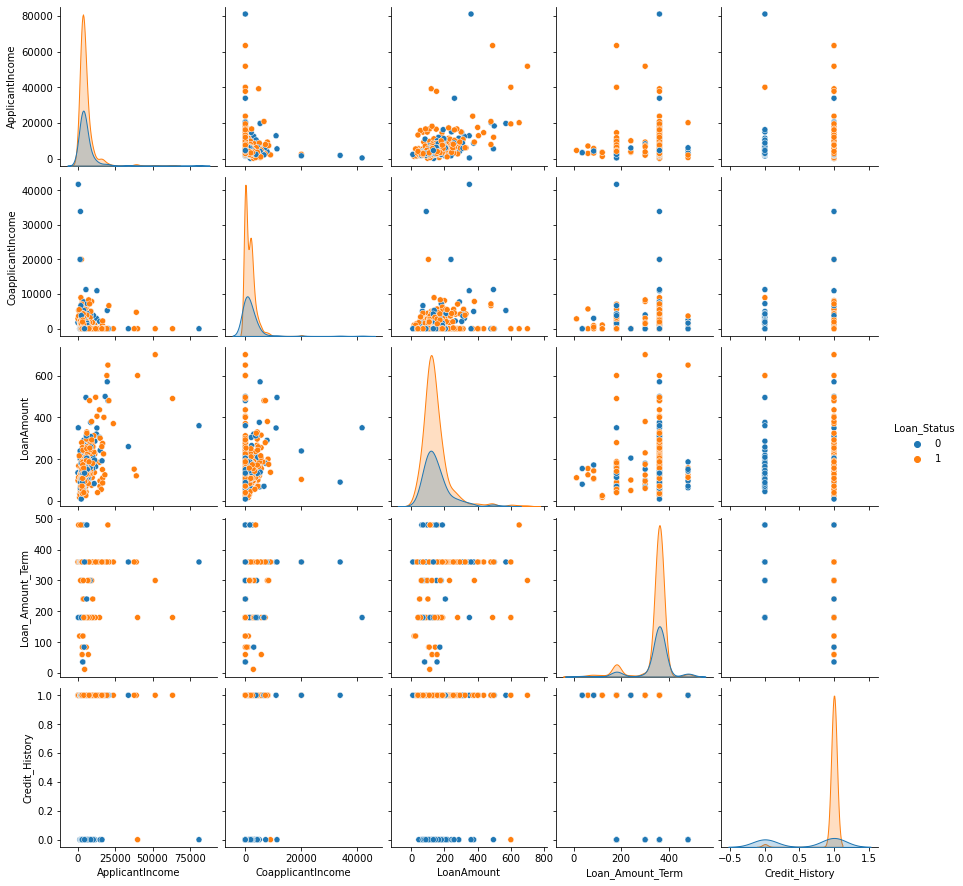

In [8]:
sns.pairplot(df, hue='Loan_Status')

In [9]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

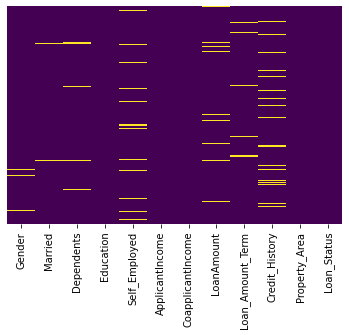

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
# Check the unique values for various columns excluding NULL values:
df[df.notnull()].nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

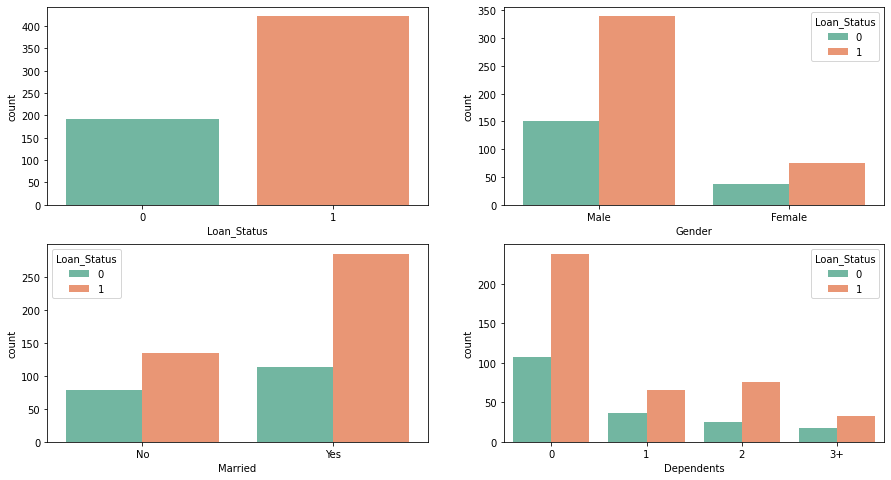

In [12]:
# DATA VISUALISATION
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(15,8))
fig.subplots_adjust(wspace=0.2)

sns.countplot(data=df, x=df["Loan_Status"], ax=ax1, palette='Set2')
sns.countplot(data=df, x=df["Gender"], hue='Loan_Status', ax=ax2, palette='Set2')
sns.countplot(data=df, x=df["Married"], hue='Loan_Status', ax=ax3, palette='Set2')
sns.countplot(data=df, x=df["Dependents"], hue='Loan_Status', ax=ax4, palette='Set2')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


In [14]:
# Summary of column count as % of total of the column
print(df['Gender'].value_counts(dropna=False))
print("Percentage of Male applicant: {:.2f}%".format(df['Gender'].value_counts(dropna=False)[0]/len(df['Gender'])*100))
print("Percentage of Female applicant: {:.2f}%".format(df['Gender'].value_counts(dropna=False)[1]/len(df['Gender'])*100))
print("Percentage of Null Gender applicant: {:.2f}%".format(df['Gender'].isnull().sum()/len(df['Gender'])*100))

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64
Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Percentage of Null Gender applicant: 2.12%


In [15]:
print(df['Married'].value_counts(dropna=False))
print("Percentage of Married applicant: {:.2f}%".format(df['Married'].value_counts(dropna=False)[0]/len(df['Married'])*100))
print("Percentage of not Married applicant: {:.2f}%".format(df['Married'].value_counts(dropna=False)[1]/len(df['Married'])*100))
print("Percentage of Null Married applicant: {:.2f}%".format(df['Married'].isnull().sum()/len(df['Married'])*100))

Yes    398
No     213
NaN      3
Name: Married, dtype: int64
Percentage of Married applicant: 64.82%
Percentage of not Married applicant: 34.69%
Percentage of Null Married applicant: 0.49%


In [16]:
print(df['Dependents'].value_counts(dropna=False))
print("Percentage of 0 Dependents: {:.2f}%".format(df['Dependents'].value_counts(dropna=False)[0]/len(df['Dependents'])*100))
print("Percentage of 1 Dependents: {:.2f}%".format(df['Dependents'].value_counts(dropna=False)[1]/len(df['Dependents'])*100))
print("Percentage of 2 Dependents: {:.2f}%".format(df['Dependents'].value_counts(dropna=False)[2]/len(df['Dependents'])*100))
print("Percentage of 3+ Dependents: {:.2f}%".format(df['Dependents'].value_counts(dropna=False)[3]/len(df['Dependents'])*100))
print("Percentage of Null Dependents: {:.2f}%".format(df['Dependents'].isnull().sum()/len(df['Dependents'])*100))

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64
Percentage of 0 Dependents: 56.19%
Percentage of 1 Dependents: 16.61%
Percentage of 2 Dependents: 16.45%
Percentage of 3+ Dependents: 8.31%
Percentage of Null Dependents: 2.44%


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

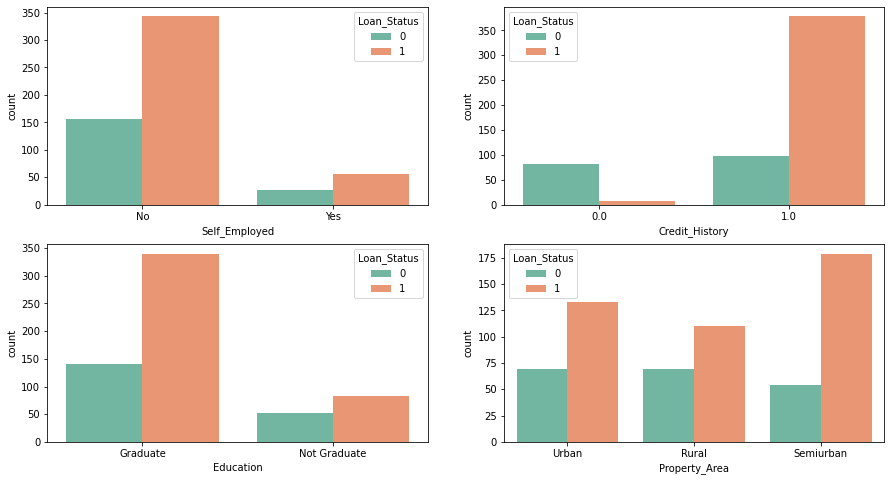

In [17]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(15,8))
fig.subplots_adjust(wspace=0.2)

sns.countplot(data=df, x=df["Self_Employed"], hue='Loan_Status', ax=ax1, palette='Set2')
sns.countplot(data=df, x=df["Credit_History"], hue='Loan_Status', ax=ax2, palette='Set2')
sns.countplot(data=df, x=df["Education"], hue='Loan_Status', ax=ax3, palette='Set2')
sns.countplot(data=df, x=df["Property_Area"], hue='Loan_Status', ax=ax4, palette='Set2')

In [18]:
print(df['Self_Employed'].value_counts(dropna=False))
print("Percentage of Self_Employed: {:.2f}%".format(df['Self_Employed'].value_counts(dropna=False)[0]/len(df['Self_Employed'])*100))
print("Percentage of Not Self_Employed: {:.2f}%".format(df['Self_Employed'].value_counts(dropna=False)[1]/len(df['Self_Employed'])*100))
print("Percentage of Null Self_Employed: {:.2f}%".format(df['Self_Employed'].isnull().sum()/len(df['Self_Employed'])*100))

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64
Percentage of Self_Employed: 81.43%
Percentage of Not Self_Employed: 13.36%
Percentage of Null Self_Employed: 5.21%


In [19]:
print(df['Credit_History'].value_counts(dropna=False))
print("Percentage of Good Credit_History: {:.2f}%".format(df['Credit_History'].value_counts(dropna=False)[0]/len(df['Credit_History'])*100))
print("Percentage of Not Good Credit_History: {:.2f}%".format(df['Credit_History'].value_counts(dropna=False)[1]/len(df['Credit_History'])*100))
print("Percentage of Null Credit_History: {:.2f}%".format(df['Credit_History'].isnull().sum()/len(df['Credit_History'])*100))

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64
Percentage of Good Credit_History: 14.50%
Percentage of Not Good Credit_History: 77.36%
Percentage of Null Credit_History: 8.14%


In [20]:
print(df['Education'].value_counts(dropna=False))
print("Percentage of Graduate: {:.2f}%".format(df['Education'].value_counts(dropna=False)[0]/len(df['Education'])*100))
print("Percentage of Not Graduate: {:.2f}%".format(df['Education'].value_counts(dropna=False)[1]/len(df['Education'])*100))
print("Percentage of Null Graduate: {:.2f}%".format(df['Education'].isnull().sum()/len(df['Education'])*100))

Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Percentage of Graduate: 78.18%
Percentage of Not Graduate: 21.82%
Percentage of Null Graduate: 0.00%


In [21]:
print(df['Property_Area'].value_counts(dropna=False))
print("Percentage of Semiurban: {:.2f}%".format(df['Property_Area'].value_counts(dropna=False)[0]/len(df['Property_Area'])*100))
print("Percentage of Urban: {:.2f}%".format(df['Property_Area'].value_counts(dropna=False)[1]/len(df['Property_Area'])*100))
print("Percentage of Rural: {:.2f}%".format(df['Property_Area'].value_counts(dropna=False)[2]/len(df['Property_Area'])*100))

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Percentage of Semiurban: 37.95%
Percentage of Urban: 32.90%
Percentage of Rural: 29.15%


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

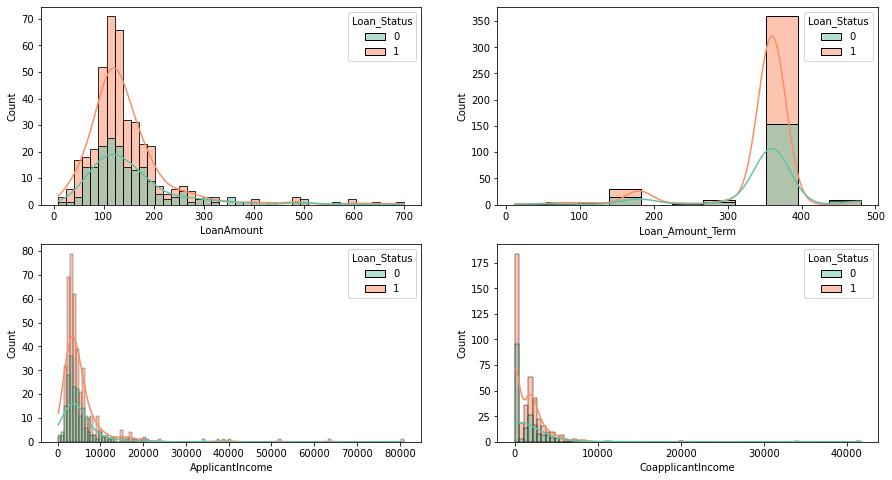

In [22]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(15,8))
fig.subplots_adjust(wspace=0.2)

sns.histplot(data=df, x=df["LoanAmount"], hue='Loan_Status', kde=True, ax=ax1, palette='Set2')
sns.histplot(data=df, x=df["Loan_Amount_Term"], hue='Loan_Status', kde=True, ax=ax2, palette='Set2')
sns.histplot(data=df, x=df["ApplicantIncome"], hue='Loan_Status', kde=True, ax=ax3, palette='Set2')
sns.histplot(data=df, x=df["CoapplicantIncome"], hue='Loan_Status', kde=True, ax=ax4, palette='Set2')

In [23]:
df['Loan_Amount_Term'].value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [24]:
df[['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']].describe()

,LoanAmount,Loan_Amount_Term,ApplicantIncome,CoapplicantIncome
count,592.000000,600.00000,614.000000,614.000000
mean,146.412162,342.00000,5403.459283,1621.245798
std,85.587325,65.12041,6109.041673,2926.248369
min,9.000000,12.00000,150.000000,0.000000
25%,100.000000,360.00000,2877.500000,0.000000
50%,128.000000,360.00000,3812.500000,1188.500000
75%,168.000000,360.00000,5795.000000,2297.250000
max,700.000000,480.00000,81000.000000,41667.000000


In [25]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
# IMPUTATION OF NULL VALUES with CORRELATION
# Level 1: LoanAmount is highly correlated to ApplicantIncome
df['LoanAmount'] = df.groupby('ApplicantIncome')['LoanAmount'].transform(lambda x: x.fillna(x.mean()))
# Level 2: LoanAmount is highly correlated to CoapplicantIncome
df['LoanAmount'] = df.groupby('CoapplicantIncome')['LoanAmount'].transform(lambda x: x.fillna(x.mean()))
# Level 3: impute remaining null cells by overall mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean()) 

# credit history is highly correlated to loan_status.
df['Credit_History'] = df.groupby('Loan_Status')['Credit_History'].transform(lambda x: x.fillna(x.mode()[0]))

In [27]:
# no major correlation hence impute based on dataset mode
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0]) 
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0]) 
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0]) 

In [28]:
df.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,145.045977,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [30]:
# https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/
#Apply one hot encoding to non ordinal columns - Gender, Married, Education, Self_Employed
df = pd.get_dummies(df, columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area' ], 
                    drop_first=True)
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,145.045977,360.0,1.0,1,1,0,0,0,0,1
1,1,4583,1508.0,128.000000,360.0,1.0,0,1,1,0,0,0,0
2,0,3000,0.0,66.000000,360.0,1.0,1,1,1,0,1,0,1
3,0,2583,2358.0,120.000000,360.0,1.0,1,1,1,1,0,0,1
4,0,6000,0.0,141.000000,360.0,1.0,1,1,0,0,0,0,1


In [31]:
df.isnull().sum()

Dependents                 15
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Loan_Status                 0
Gender_Male                 0
Married_Yes                 0
Education_Not Graduate      0
Self_Employed_Yes           0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [32]:
# Check Dependents column
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [33]:
# Amend the 3+ to 3
df['Dependents'] = df['Dependents'].replace("3+", 3)
df['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [34]:
# Null records imputation
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0]) 
df.isnull().sum()

Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Gender_Male                0
Married_Yes                0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [35]:
corr = df.corr()
corr_dp = np.round(corr, decimals=2)
corr_dp

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
ApplicantIncome,1.00,-0.12,0.57,-0.05,-0.02,-0.00,0.06,0.05,-0.14,0.13,-0.01,-0.00
CoapplicantIncome,-0.12,1.00,0.19,-0.06,0.01,-0.06,0.08,0.08,-0.06,-0.02,-0.03,0.02
LoanAmount,0.57,0.19,1.00,0.04,-0.00,-0.03,0.11,0.14,-0.17,0.12,-0.01,-0.04
Loan_Amount_Term,-0.05,-0.06,0.04,1.00,-0.00,-0.02,-0.07,-0.10,-0.07,-0.03,0.06,-0.09
Credit_History,-0.02,0.01,-0.00,-0.00,1.00,0.54,0.01,0.01,-0.07,-0.00,0.04,-0.02
Loan_Status,-0.00,-0.06,-0.03,-0.02,0.54,1.00,0.02,0.09,-0.09,-0.00,0.14,-0.04
Gender_Male,0.06,0.08,0.11,-0.07,0.01,0.02,1.00,0.36,0.05,-0.00,-0.11,0.03
Married_Yes,0.05,0.08,0.14,-0.10,0.01,0.09,0.36,1.00,0.01,0.00,0.01,0.00
Education_Not Graduate,-0.14,-0.06,-0.17,-0.07,-0.07,-0.09,0.05,0.01,1.00,-0.01,-0.04,-0.03
Self_Employed_Yes,0.13,-0.02,0.12,-0.03,-0.00,-0.00,-0.00,0.00,-0.01,1.00,0.01,-0.03


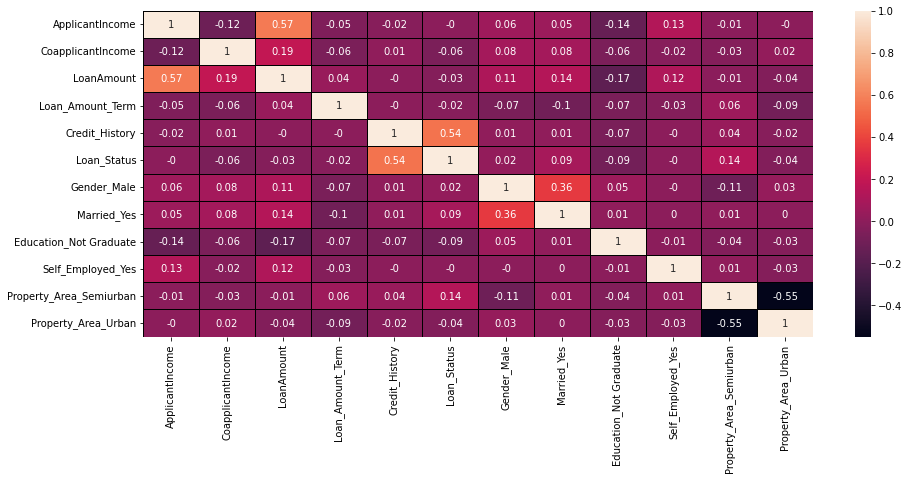

In [36]:
# Correlation heatmap
plt.figure(figsize=(15,6))
sns.heatmap(data=corr_dp, linewidths=1, linecolor='black',annot=True);

In [37]:
# Define X and y
X = df.drop(columns = 'Loan_Status')
y = df['Loan_Status']

### Feature Selection

In [38]:
from sklearn import linear_model
from sklearn.feature_selection import RFE

logreg_model = linear_model.LogisticRegression()

RFE = RFE(estimator=logreg_model, n_features_to_select=5, step=1)
RFE.fit(X, y)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [39]:
RFE.support_

array([False, False, False, False, False,  True, False,  True,  True,
       False,  True,  True])

In [40]:
RFE.ranking_

array([4, 8, 7, 6, 5, 1, 3, 1, 1, 2, 1, 1])

In [41]:
feature_selected = X.columns[RFE.get_support()]
feature_selected

Index(['Credit_History', 'Married_Yes', 'Education_Not Graduate',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [42]:
# define new X with feature selected
X_new = df[feature_selected]
X_new.head(3)

,Credit_History,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0,0,0,1
1,1.0,1,0,0,0
2,1.0,1,0,0,1


<AxesSubplot:>

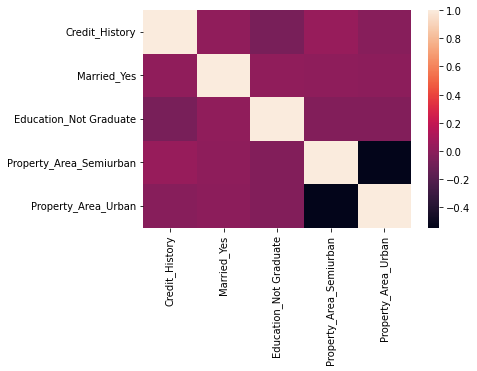

In [43]:
sns.heatmap(X_new.corr())

In [44]:
X.head(3)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,145.045977,360.0,1.0,1,0,0,0,0,1
1,1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0
2,0,3000,0.0,66.000000,360.0,1.0,1,1,0,1,0,1


In [45]:
from sklearn.model_selection import cross_val_score
# Calculate accuracy scores with NEW features

initial_score = cross_val_score(logreg_model, X, y, cv=10, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))

fe_score = cross_val_score(logreg_model, X_new, y, cv=10, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.8063458487572712 
Accuracy after Feature Selection : 0.8095716552088842 


### Train Test Split - Scaling Data

In [46]:
#Splitting Data into Training and Test Sets, choose stratify to maintain X/Y ratio in splits
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=16, test_size = 0.20)

# Standardise data
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Balance any imbalanced dataset 
#model = SMOTE(random_state =42)
#X_train, y_train = model.fit_resample(X_train, y_train)

# Check values of outcomes before and after to ensure SMOTE is successful
print(y_train.value_counts())

# Use this train set for all models below

1    344
0    147
Name: Loan_Status, dtype: int64


#### Model 1: Logistic Regression

In [47]:
# Make an instance of the Model
lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

# predicted test probability:

y_pred = lr_model.predict(X_test)

y_proba_lr = lr_model.predict_proba(X_test)
y_proba_lr = y_proba_lr[:,1].reshape((y_proba_lr.shape[0],))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))
print(f'Training Accuracy Score: {lr_model.score(X_train, y_train)}')
print(f'Testing Accuracy Score: {lr_model.score(X_test, y_test)}')

              precision    recall  f1-score   support

           0     1.0000    0.3778    0.5484        45
           1     0.7358    1.0000    0.8478        78

    accuracy                         0.7724       123
   macro avg     0.8679    0.6889    0.6981       123
weighted avg     0.8325    0.7724    0.7383       123

Training Accuracy Score: 0.8187372708757638
Testing Accuracy Score: 0.7723577235772358


In [48]:
# Confusion matrix for Logistic Regression:
lr_cm = metrics.confusion_matrix(y_test, y_pred)

modified_lr_cm = []
for index,value in enumerate(lr_cm):
    if index == 0:
        modified_lr_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_lr_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   
        
modified_lr_cm

[['TN = 17', 'FP = 28'], ['FN = 0', 'TP = 78']]

0.7408831908831909


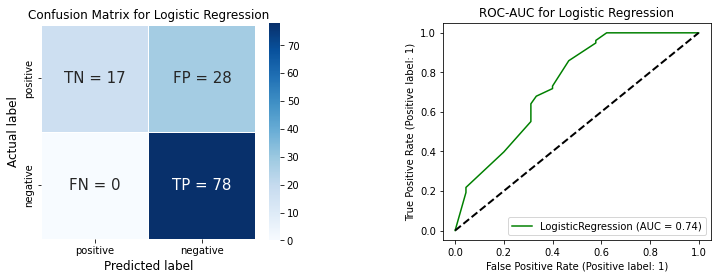

In [49]:
# Confusion Matrix & ROC Curve for Logistic Regression

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.subplots_adjust(wspace=0.5)

sns.heatmap(lr_cm, annot=modified_lr_cm,
            fmt="",
            annot_kws={"size": 15},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            ax = ax1,
            xticklabels = ['positive', 'negative'],
            yticklabels = ['positive', 'negative'],
            );

ax1.set_ylabel('Actual label', fontsize = 12);
ax1.set_xlabel('Predicted label', fontsize = 12);
ax1.set_title('Confusion Matrix for Logistic Regression')

metrics.plot_roc_curve(lr_model, X_test, y_test, color='green', ax=ax2) 
ax2.plot([0, 1], [0, 1], color = 'black', lw = 2, linestyle = '--')
ax2.set_title('ROC-AUC for Logistic Regression')
print(roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))

#### Model 2: Support Vector Machine

In [50]:
from sklearn import svm
# Make an instance of the Model
svc_model = svm.SVC(probability=True)

# Training the model on the data
svc_model.fit(X_train, y_train)

# predict test class:
y_pred_svc = svc_model.predict(X_test)

# predicted test probability:
y_proba = svc_model.predict_proba(X_test)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc, digits=4))
print(f'Training Accuracy Score: {svc_model.score(X_train, y_train)}')
print(f'Testing Accuracy Score: {svc_model.score(X_test, y_test)}')

              precision    recall  f1-score   support

           0     1.0000    0.3778    0.5484        45
           1     0.7358    1.0000    0.8478        78

    accuracy                         0.7724       123
   macro avg     0.8679    0.6889    0.6981       123
weighted avg     0.8325    0.7724    0.7383       123

Training Accuracy Score: 0.8187372708757638
Testing Accuracy Score: 0.7723577235772358


In [52]:
# Confusion matrix for Support Vector Machine:
svm_cm = metrics.confusion_matrix(y_test, y_pred_svc)

modified_svm_cm = []
for index,value in enumerate(svm_cm):
    if index == 0:
        modified_svm_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_svm_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   
        
modified_svm_cm

[['TN = 17', 'FP = 28'], ['FN = 0', 'TP = 78']]

Text(0.5, 1.0, 'ROC-AUC for Support Vector Machine')

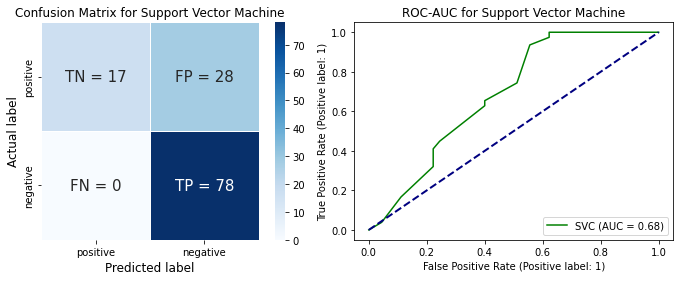

In [53]:
# Confusion Matrix & ROC Curve for Support Vector Machine

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.subplots_adjust(wspace=0.1)

sns.heatmap(svm_cm, annot=modified_svm_cm,
            fmt="",
            annot_kws={"size": 15},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            ax = ax1,
            xticklabels = ['positive', 'negative'],
            yticklabels = ['positive', 'negative'],
            );

ax1.set_ylabel('Actual label', fontsize = 12);
ax1.set_xlabel('Predicted label', fontsize = 12);
ax1.set_title('Confusion Matrix for Support Vector Machine')

metrics.plot_roc_curve(svc_model, X_test, y_test, color='green', ax=ax2) 
ax2.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
ax2.set_title('ROC-AUC for Support Vector Machine')

#### Model 3: Naive Bayes

In [54]:
#from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import MultinomialNB

# Make an instance of the Model
nb_model = GaussianNB()

# Training the model on the data
nb_model.fit(X_train, y_train)

# predict test class:
y_pred_nb = nb_model.predict(X_test)

# predicted test probability:
y_proba = nb_model.predict_proba(X_test)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb, digits=4))
print(f'Training Accuracy Score: {nb_model.score(X_train, y_train)}')
print(f'Testing Accuracy Score: {nb_model.score(X_test, y_test)}')

              precision    recall  f1-score   support

           0     1.0000    0.3778    0.5484        45
           1     0.7358    1.0000    0.8478        78

    accuracy                         0.7724       123
   macro avg     0.8679    0.6889    0.6981       123
weighted avg     0.8325    0.7724    0.7383       123

Training Accuracy Score: 0.8187372708757638
Testing Accuracy Score: 0.7723577235772358


In [56]:
# Confusion matrix:
nb_cm = metrics.confusion_matrix(y_test, y_pred_nb)

modified_nb_cm = []
for index,value in enumerate(nb_cm):
    if index == 0:
        modified_nb_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_nb_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   
        
modified_nb_cm

[['TN = 17', 'FP = 28'], ['FN = 0', 'TP = 78']]

Text(0.5, 1.0, 'ROC-AUC for Gaussian Naive Bayes')

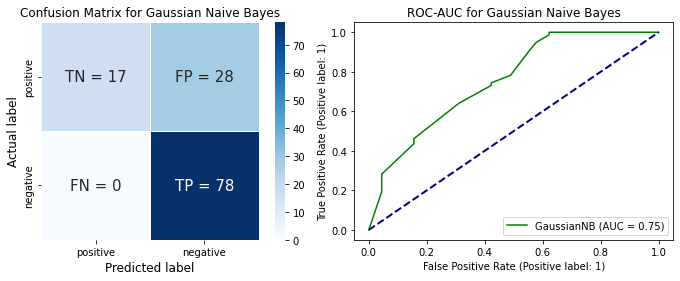

In [57]:
# Confusion Matrix & ROC Curve for Gaussian Naive Bayes

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.subplots_adjust(wspace=0.1)

sns.heatmap(nb_cm, annot=modified_nb_cm,
            fmt="",
            annot_kws={"size": 15},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            ax = ax1,
            xticklabels = ['positive', 'negative'],
            yticklabels = ['positive', 'negative'],
            );

ax1.set_ylabel('Actual label', fontsize = 12);
ax1.set_xlabel('Predicted label', fontsize = 12);
ax1.set_title('Confusion Matrix for Gaussian Naive Bayes')

metrics.plot_roc_curve(nb_model, X_test, y_test, color='green', ax=ax2) 
ax2.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
ax2.set_title('ROC-AUC for Gaussian Naive Bayes')

### Summaries of Models before Optimisation

0.7408831908831909
0.6844729344729344
0.7548433048433049


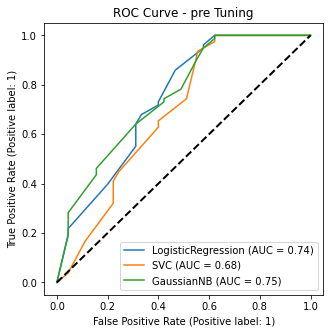

In [58]:
from sklearn.metrics import plot_roc_curve, RocCurveDisplay, roc_auc_score

plt.figure(figsize=(5,5))
ax=plt.subplot(111)
plot_roc_curve(lr_model, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(svc_model, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(nb_model, X_test, y_test, ax=ax)
plt.plot([0, 1], [0, 1], color = 'black', lw = 2, linestyle = '--')
plt.title("ROC Curve - pre Tuning")

print(roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))
print(roc_auc_score(y_test, svc_model.predict_proba(X_test)[:, 1]))
print(roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1]))

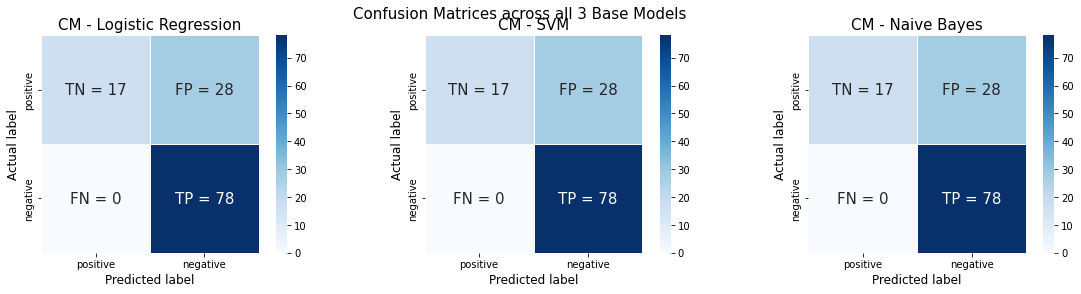

In [104]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
fig.subplots_adjust(wspace=0.1)
plt.suptitle('Confusion Matrices across all 3 Base Models', fontsize = 15) 

sns.heatmap(lr_cm, annot=modified_lr_cm, fmt="", annot_kws={"size": 15}, linewidths=.5, 
            square = True, cmap = 'Blues', ax=ax1, xticklabels = ['positive', 'negative'],
            yticklabels = ['positive', 'negative'])
ax1.set_ylabel('Actual label', fontsize = 12);
ax1.set_xlabel('Predicted label', fontsize = 12);
ax1.set_title('CM - Logistic Regression', fontsize = 15);

sns.heatmap(svm_cm, annot=modified_svm_cm, fmt="", annot_kws={"size": 15}, linewidths=.5, 
            square = True, cmap = 'Blues', ax=ax2, xticklabels = ['positive', 'negative'],
            yticklabels = ['positive', 'negative'])
ax2.set_ylabel('Actual label', fontsize = 12);
ax2.set_xlabel('Predicted label', fontsize = 12);
ax2.set_title('CM - SVM', fontsize = 15);

sns.heatmap(nb_cm, annot=modified_nb_cm, fmt="", annot_kws={"size": 15}, linewidths=.5, 
            square = True, cmap = 'Blues', ax=ax3, xticklabels = ['positive', 'negative'],
            yticklabels = ['positive', 'negative'])
ax3.set_ylabel('Actual label', fontsize = 12);
ax3.set_xlabel('Predicted label', fontsize = 12);
ax3.set_title('CM - Naive Bayes', fontsize = 15);

In [60]:
# MODELS SCORES

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [61]:
base_mods = [lr_model, svc_model, nb_model]
fitted = [mod.fit(X_train,y_train) for mod in base_mods]

base_model_df = pd.DataFrame({'Model': [type(i).__name__ for i in fitted]})

In [62]:
# Confirm the parameter of base models
print(lr_model)
print(svc_model)
print(nb_model)

LogisticRegression()
SVC(probability=True)
GaussianNB()


In [63]:
Training_Accuracy_score = []
Test_Accuracy_score = []
Precision_score = []
Recall_score = []
F1_score = []
AUC_score = []

for mod in base_mods:
    train_accuracy = accuracy_score(y_train, mod.predict(X_train))
    test_accuracy = accuracy_score(y_test, mod.predict(X_test))
    precision = precision_score(y_test, mod.predict(X_test))
    recall = recall_score(y_test, mod.predict(X_test))
    f1 = f1_score(y_test, mod.predict(X_test))
    auc = roc_auc_score(y_test, mod.predict_proba(X_test)[:, 1])
     
    Training_Accuracy_score.append(train_accuracy)
    Test_Accuracy_score.append(test_accuracy)
    Precision_score.append(precision)
    Recall_score.append(recall)
    F1_score.append(f1)    
    AUC_score.append(auc)

In [64]:
# create columns in dataframe

base_model_df['Train Accuracy'] = Training_Accuracy_score
base_model_df['Test Accuracy'] = Test_Accuracy_score
base_model_df['Precision'] = Precision_score
base_model_df['Recall'] = Recall_score
base_model_df['F1'] = F1_score
base_model_df['AUC'] = AUC_score

# print dataframe for pre model optimisation
base_model_df = base_model_df.round(decimals = 4)
base_model_df

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1,AUC
0,LogisticRegression,0.8187,0.7724,0.7358,1.0,0.8478,0.7409
1,SVC,0.8187,0.7724,0.7358,1.0,0.8478,0.6845
2,GaussianNB,0.8187,0.7724,0.7358,1.0,0.8478,0.7548


#### Gridsearch Optimal Parameters for All Models

<b>1. Find Best Estimator For Logistic Regression<b>

In [65]:
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100], 
}

In [66]:
from sklearn.model_selection import GridSearchCV

grid_lr = GridSearchCV(lr_model, lr_params, cv=10, verbose = 4, scoring='roc_auc')
grid_lr.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10] END ................C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 2/10] END ................C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 3/10] END ................C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 4/10] END ................C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 5/10] END ................C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 6/10] END ................C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 7/10] END ................C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 8/10] END ................C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 9/10] END ................C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 10/10] END ...............C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 1/10] END ..............C=1e-05, penalty=l2;, score=0.753 total time=   0.1s
[CV 2/10] END ..............C=1e-05, penalty=l

[CV 3/10] END .................C=10, penalty=l2;, score=0.668 total time=   0.0s
[CV 4/10] END .................C=10, penalty=l2;, score=0.697 total time=   0.0s
[CV 5/10] END .................C=10, penalty=l2;, score=0.691 total time=   0.0s
[CV 6/10] END .................C=10, penalty=l2;, score=0.912 total time=   0.0s
[CV 7/10] END .................C=10, penalty=l2;, score=0.770 total time=   0.0s
[CV 8/10] END .................C=10, penalty=l2;, score=0.823 total time=   0.0s
[CV 9/10] END .................C=10, penalty=l2;, score=0.882 total time=   0.0s
[CV 10/10] END ................C=10, penalty=l2;, score=0.740 total time=   0.0s
[CV 1/10] END ..................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 2/10] END ..................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 3/10] END ..................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 4/10] END ..................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 5/10] END ..............

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=4)

In [67]:
grid_lr.best_score_

0.777295318127251

In [68]:
grid_lr.best_params_

{'C': 1, 'penalty': 'l2'}

In [69]:
grid_lr.best_estimator_

LogisticRegression(C=1)

In [70]:
# Rerun based on based parameters
best_lr = LogisticRegression(C=1, penalty='l2')

# Fit the best model
best_lr.fit(X_train, y_train)

LogisticRegression(C=1)

In [71]:
best_lr_predictions = best_lr.predict(X_test)
print(classification_report(y_test,best_lr_predictions, digits=4))

print(f'Training Accuracy Score: {best_lr.score(X_train, y_train)}')
print(f'Testing Accuracy Score: {best_lr.score(X_test, y_test)}')

              precision    recall  f1-score   support

           0     1.0000    0.3778    0.5484        45
           1     0.7358    1.0000    0.8478        78

    accuracy                         0.7724       123
   macro avg     0.8679    0.6889    0.6981       123
weighted avg     0.8325    0.7724    0.7383       123

Training Accuracy Score: 0.8187372708757638
Testing Accuracy Score: 0.7723577235772358


In [72]:
# Confusion matrix for Logistic Regression:
lr_cm_best = metrics.confusion_matrix(y_test, best_lr_predictions)

best_lr_cm = []
for index,value in enumerate(lr_cm_best):
    if index == 0:
        best_lr_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        best_lr_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   
        
best_lr_cm

[['TN = 17', 'FP = 28'], ['FN = 0', 'TP = 78']]

0.7408831908831909

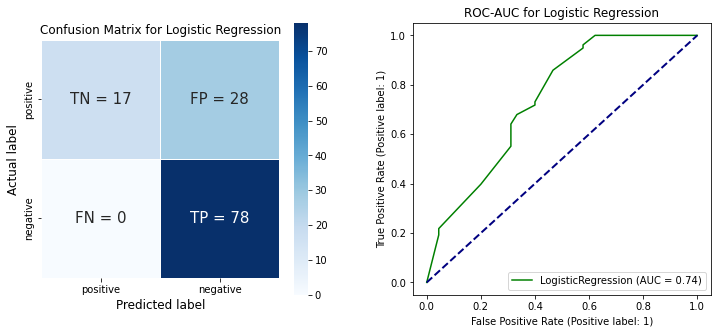

In [73]:
# Confusion Matrix & ROC Curve for Logistic Regression:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.subplots_adjust(wspace=0.25)

sns.heatmap(lr_cm_best, annot=best_lr_cm,
            fmt="",
            annot_kws={"size": 15},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            ax = ax1,
            xticklabels = ['positive', 'negative'],
            yticklabels = ['positive', 'negative'],
            );

ax1.set_ylabel('Actual label', fontsize = 12);
ax1.set_xlabel('Predicted label', fontsize = 12);
ax1.set_title('Confusion Matrix for Logistic Regression')

metrics.plot_roc_curve(best_lr, X_test, y_test, color='green', ax=ax2) 
ax2.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
ax2.set_title('ROC-AUC for Logistic Regression')
roc_auc_score(y_test, best_lr.predict_proba(X_test)[:, 1])

<b>2. Find Best Estimator For Support Vector Machine<b>

In [74]:
svc_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf'],
}

In [75]:
#find best hyper parameters for SVM/SVC
svc = svm.SVC(probability=True)
grid_svc = GridSearchCV(svc, svc_params, cv=10, scoring='roc_auc', verbose = 4)
grid_svc.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10] END C=0.1, gamma=0.001, kernel=linear;, score=0.610 total time=   0.0s
[CV 2/10] END C=0.1, gamma=0.001, kernel=linear;, score=0.628 total time=   0.0s
[CV 3/10] END C=0.1, gamma=0.001, kernel=linear;, score=0.630 total time=   0.0s
[CV 4/10] END C=0.1, gamma=0.001, kernel=linear;, score=0.627 total time=   0.0s
[CV 5/10] END C=0.1, gamma=0.001, kernel=linear;, score=0.755 total time=   0.0s
[CV 6/10] END C=0.1, gamma=0.001, kernel=linear;, score=0.666 total time=   0.0s
[CV 7/10] END C=0.1, gamma=0.001, kernel=linear;, score=0.670 total time=   0.0s
[CV 8/10] END C=0.1, gamma=0.001, kernel=linear;, score=0.673 total time=   0.0s
[CV 9/10] END C=0.1, gamma=0.001, kernel=linear;, score=0.872 total time=   0.0s
[CV 10/10] END C=0.1, gamma=0.001, kernel=linear;, score=0.731 total time=   0.0s
[CV 1/10] END ...C=0.1, gamma=0.001, kernel=rbf;, score=0.679 total time=   0.0s
[CV 2/10] END ...C=0.1, gamma=0.001, kernel=r

[CV 6/10] END C=10, gamma=0.0001, kernel=linear;, score=0.786 total time=   0.0s
[CV 7/10] END C=10, gamma=0.0001, kernel=linear;, score=0.601 total time=   0.0s
[CV 8/10] END C=10, gamma=0.0001, kernel=linear;, score=0.577 total time=   0.0s
[CV 9/10] END C=10, gamma=0.0001, kernel=linear;, score=0.845 total time=   0.0s
[CV 10/10] END C=10, gamma=0.0001, kernel=linear;, score=0.683 total time=   0.0s
[CV 1/10] END ...C=10, gamma=0.0001, kernel=rbf;, score=0.685 total time=   0.0s
[CV 2/10] END ...C=10, gamma=0.0001, kernel=rbf;, score=0.777 total time=   0.0s
[CV 3/10] END ...C=10, gamma=0.0001, kernel=rbf;, score=0.619 total time=   0.0s
[CV 4/10] END ...C=10, gamma=0.0001, kernel=rbf;, score=0.715 total time=   0.0s
[CV 5/10] END ...C=10, gamma=0.0001, kernel=rbf;, score=0.560 total time=   0.0s
[CV 6/10] END ...C=10, gamma=0.0001, kernel=rbf;, score=0.906 total time=   0.0s
[CV 7/10] END ...C=10, gamma=0.0001, kernel=rbf;, score=0.672 total time=   0.0s
[CV 8/10] END ...C=10, gamm

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             scoring='roc_auc', verbose=4)

In [76]:
grid_svc.best_score_

0.7680532212885154

In [77]:
grid_svc.best_params_

{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [78]:
grid_svc.best_estimator_

SVC(C=0.1, gamma=0.0001, probability=True)

In [79]:
# Rerun based on based parameters
best_svc = svm.SVC(C=0.1, gamma=0.0001, probability=True)

# Fit the best model
best_svc.fit(X_train, y_train)

SVC(C=0.1, gamma=0.0001, probability=True)

In [80]:
best_svc_predictions = best_svc.predict(X_test)
print(classification_report(y_test,best_svc_predictions, digits=4))

print(f'Training Accuracy Score: {best_svc.score(X_train, y_train)}')
print(f'Testing Accuracy Score: {best_svc.score(X_test, y_test)}')

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        45
           1     0.6341    1.0000    0.7761        78

    accuracy                         0.6341       123
   macro avg     0.3171    0.5000    0.3881       123
weighted avg     0.4021    0.6341    0.4922       123

Training Accuracy Score: 0.7006109979633401
Testing Accuracy Score: 0.6341463414634146


In [81]:
# Confusion matrix for Support Vector Machine:
svc_cm_best = metrics.confusion_matrix(y_test, best_svc_predictions)

best_svc_cm = []
for index,value in enumerate(svc_cm_best):
    if index == 0:
        best_svc_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        best_svc_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   
        

print(svc_cm_best)
print(best_svc_cm)

[[ 0 45]
 [ 0 78]]
[['TN = 0', 'FP = 45'], ['FN = 0', 'TP = 78']]


0.7027065527065527

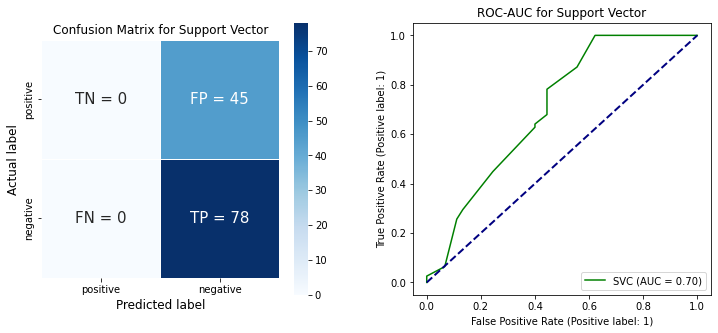

In [82]:
# Confusion Matrix & ROC Curve for Support Vector Machine

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.subplots_adjust(wspace=0.25)

sns.heatmap(svc_cm_best, annot=best_svc_cm,
            fmt="",
            annot_kws={"size": 15},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            ax = ax1,
            xticklabels = ['positive', 'negative'],
            yticklabels = ['positive', 'negative'],
            );

ax1.set_ylabel('Actual label', fontsize = 12);
ax1.set_xlabel('Predicted label', fontsize = 12);
ax1.set_title('Confusion Matrix for Support Vector')

metrics.plot_roc_curve(best_svc, X_test, y_test, color='green', ax=ax2) 
ax2.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
ax2.set_title('ROC-AUC for Support Vector')
roc_auc_score(y_test, best_svc.predict_proba(X_test)[:, 1])

<b>3. Find Best Estimator For Gaussian Naive Bayes<b>

In [83]:
nb_params = {
    'var_smoothing': np.logspace(0,-9, num=100),
    }

In [84]:
#find best hyper parameters for Naive Bayes

grid_nb = GridSearchCV(nb_model, nb_params, scoring='roc_auc', cv=10, verbose = 4)
grid_nb.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END ................var_smoothing=1.0;, score=0.753 total time=   0.0s
[CV 2/10] END ................var_smoothing=1.0;, score=0.760 total time=   0.0s
[CV 3/10] END ................var_smoothing=1.0;, score=0.611 total time=   0.0s
[CV 4/10] END ................var_smoothing=1.0;, score=0.666 total time=   0.0s
[CV 5/10] END ................var_smoothing=1.0;, score=0.687 total time=   0.0s
[CV 6/10] END ................var_smoothing=1.0;, score=0.955 total time=   0.0s
[CV 7/10] END ................var_smoothing=1.0;, score=0.754 total time=   0.0s
[CV 8/10] END ................var_smoothing=1.0;, score=0.799 total time=   0.0s
[CV 9/10] END ................var_smoothing=1.0;, score=0.906 total time=   0.0s
[CV 10/10] END ...............var_smoothing=1.0;, score=0.728 total time=   0.0s
[CV 1/10] END .var_smoothing=0.8111308307896871;, score=0.753 total time=   0.0s
[CV 2/10] END .var_smoothing=0.8111308307896

[CV 4/10] END .var_smoothing=0.0657933224657568;, score=0.662 total time=   0.0s
[CV 5/10] END .var_smoothing=0.0657933224657568;, score=0.679 total time=   0.0s
[CV 6/10] END .var_smoothing=0.0657933224657568;, score=0.949 total time=   0.0s
[CV 7/10] END .var_smoothing=0.0657933224657568;, score=0.754 total time=   0.0s
[CV 8/10] END .var_smoothing=0.0657933224657568;, score=0.789 total time=   0.0s
[CV 9/10] END .var_smoothing=0.0657933224657568;, score=0.920 total time=   0.0s
[CV 10/10] END var_smoothing=0.0657933224657568;, score=0.728 total time=   0.0s
[CV 1/10] END .var_smoothing=0.0533669923120631;, score=0.748 total time=   0.0s
[CV 2/10] END .var_smoothing=0.0533669923120631;, score=0.764 total time=   0.0s
[CV 3/10] END .var_smoothing=0.0533669923120631;, score=0.611 total time=   0.0s
[CV 4/10] END .var_smoothing=0.0533669923120631;, score=0.662 total time=   0.0s
[CV 5/10] END .var_smoothing=0.0533669923120631;, score=0.679 total time=   0.0s
[CV 6/10] END .var_smoothing

[CV 9/10] END var_smoothing=0.008111308307896872;, score=0.920 total time=   0.0s
[CV 10/10] END var_smoothing=0.008111308307896872;, score=0.730 total time=   0.0s
[CV 1/10] END var_smoothing=0.006579332246575682;, score=0.748 total time=   0.0s
[CV 2/10] END var_smoothing=0.006579332246575682;, score=0.764 total time=   0.0s
[CV 3/10] END var_smoothing=0.006579332246575682;, score=0.611 total time=   0.0s
[CV 4/10] END var_smoothing=0.006579332246575682;, score=0.662 total time=   0.0s
[CV 5/10] END var_smoothing=0.006579332246575682;, score=0.699 total time=   0.0s
[CV 6/10] END var_smoothing=0.006579332246575682;, score=0.943 total time=   0.0s
[CV 7/10] END var_smoothing=0.006579332246575682;, score=0.754 total time=   0.0s
[CV 8/10] END var_smoothing=0.006579332246575682;, score=0.789 total time=   0.0s
[CV 9/10] END var_smoothing=0.006579332246575682;, score=0.920 total time=   0.0s
[CV 10/10] END var_smoothing=0.006579332246575682;, score=0.730 total time=   0.0s
[CV 1/10] END 

[CV 6/10] END var_smoothing=0.0006579332246575676;, score=0.943 total time=   0.0s
[CV 7/10] END var_smoothing=0.0006579332246575676;, score=0.754 total time=   0.0s
[CV 8/10] END var_smoothing=0.0006579332246575676;, score=0.789 total time=   0.0s
[CV 9/10] END var_smoothing=0.0006579332246575676;, score=0.920 total time=   0.0s
[CV 10/10] END var_smoothing=0.0006579332246575676;, score=0.730 total time=   0.0s
[CV 1/10] END var_smoothing=0.0005336699231206307;, score=0.748 total time=   0.0s
[CV 2/10] END var_smoothing=0.0005336699231206307;, score=0.764 total time=   0.0s
[CV 3/10] END var_smoothing=0.0005336699231206307;, score=0.611 total time=   0.0s
[CV 4/10] END var_smoothing=0.0005336699231206307;, score=0.662 total time=   0.0s
[CV 5/10] END var_smoothing=0.0005336699231206307;, score=0.699 total time=   0.0s
[CV 6/10] END var_smoothing=0.0005336699231206307;, score=0.943 total time=   0.0s
[CV 7/10] END var_smoothing=0.0005336699231206307;, score=0.754 total time=   0.0s
[CV

[CV 5/10] END var_smoothing=4.328761281083062e-05;, score=0.699 total time=   0.0s
[CV 6/10] END var_smoothing=4.328761281083062e-05;, score=0.943 total time=   0.0s
[CV 7/10] END var_smoothing=4.328761281083062e-05;, score=0.754 total time=   0.0s
[CV 8/10] END var_smoothing=4.328761281083062e-05;, score=0.789 total time=   0.0s
[CV 9/10] END var_smoothing=4.328761281083062e-05;, score=0.920 total time=   0.0s
[CV 10/10] END var_smoothing=4.328761281083062e-05;, score=0.730 total time=   0.0s
[CV 1/10] END var_smoothing=3.511191734215127e-05;, score=0.748 total time=   0.0s
[CV 2/10] END var_smoothing=3.511191734215127e-05;, score=0.764 total time=   0.0s
[CV 3/10] END var_smoothing=3.511191734215127e-05;, score=0.611 total time=   0.0s
[CV 4/10] END var_smoothing=3.511191734215127e-05;, score=0.662 total time=   0.0s
[CV 5/10] END var_smoothing=3.511191734215127e-05;, score=0.699 total time=   0.0s
[CV 6/10] END var_smoothing=3.511191734215127e-05;, score=0.943 total time=   0.0s
[CV

[CV 10/10] END var_smoothing=2.848035868435799e-06;, score=0.730 total time=   0.0s
[CV 1/10] END var_smoothing=2.310129700083158e-06;, score=0.748 total time=   0.0s
[CV 2/10] END var_smoothing=2.310129700083158e-06;, score=0.764 total time=   0.0s
[CV 3/10] END var_smoothing=2.310129700083158e-06;, score=0.611 total time=   0.0s
[CV 4/10] END var_smoothing=2.310129700083158e-06;, score=0.662 total time=   0.0s
[CV 5/10] END var_smoothing=2.310129700083158e-06;, score=0.699 total time=   0.0s
[CV 6/10] END var_smoothing=2.310129700083158e-06;, score=0.943 total time=   0.0s
[CV 7/10] END var_smoothing=2.310129700083158e-06;, score=0.754 total time=   0.0s
[CV 8/10] END var_smoothing=2.310129700083158e-06;, score=0.789 total time=   0.0s
[CV 9/10] END var_smoothing=2.310129700083158e-06;, score=0.920 total time=   0.0s
[CV 10/10] END var_smoothing=2.310129700083158e-06;, score=0.730 total time=   0.0s
[CV 1/10] END var_smoothing=1.873817422860383e-06;, score=0.748 total time=   0.0s
[C

[CV 7/10] END var_smoothing=2.848035868435799e-07;, score=0.754 total time=   0.0s
[CV 8/10] END var_smoothing=2.848035868435799e-07;, score=0.789 total time=   0.0s
[CV 9/10] END var_smoothing=2.848035868435799e-07;, score=0.920 total time=   0.0s
[CV 10/10] END var_smoothing=2.848035868435799e-07;, score=0.730 total time=   0.0s
[CV 1/10] END var_smoothing=2.310129700083158e-07;, score=0.748 total time=   0.0s
[CV 2/10] END var_smoothing=2.310129700083158e-07;, score=0.764 total time=   0.0s
[CV 3/10] END var_smoothing=2.310129700083158e-07;, score=0.611 total time=   0.0s
[CV 4/10] END var_smoothing=2.310129700083158e-07;, score=0.662 total time=   0.0s
[CV 5/10] END var_smoothing=2.310129700083158e-07;, score=0.699 total time=   0.0s
[CV 6/10] END var_smoothing=2.310129700083158e-07;, score=0.943 total time=   0.0s
[CV 7/10] END var_smoothing=2.310129700083158e-07;, score=0.754 total time=   0.0s
[CV 8/10] END var_smoothing=2.310129700083158e-07;, score=0.789 total time=   0.0s
[CV

[CV 1/10] END var_smoothing=1.232846739442066e-08;, score=0.748 total time=   0.0s
[CV 2/10] END var_smoothing=1.232846739442066e-08;, score=0.764 total time=   0.0s
[CV 3/10] END var_smoothing=1.232846739442066e-08;, score=0.611 total time=   0.0s
[CV 4/10] END var_smoothing=1.232846739442066e-08;, score=0.662 total time=   0.0s
[CV 5/10] END var_smoothing=1.232846739442066e-08;, score=0.699 total time=   0.0s
[CV 6/10] END var_smoothing=1.232846739442066e-08;, score=0.943 total time=   0.0s
[CV 7/10] END var_smoothing=1.232846739442066e-08;, score=0.754 total time=   0.0s
[CV 8/10] END var_smoothing=1.232846739442066e-08;, score=0.789 total time=   0.0s
[CV 9/10] END var_smoothing=1.232846739442066e-08;, score=0.920 total time=   0.0s
[CV 10/10] END var_smoothing=1.232846739442066e-08;, score=0.730 total time=   0.0s
[CV 1/10] END ..............var_smoothing=1e-08;, score=0.748 total time=   0.0s
[CV 2/10] END ..............var_smoothing=1e-08;, score=0.764 total time=   0.0s
[CV 3/1

[CV 2/10] END ..............var_smoothing=1e-09;, score=0.764 total time=   0.0s
[CV 3/10] END ..............var_smoothing=1e-09;, score=0.611 total time=   0.0s
[CV 4/10] END ..............var_smoothing=1e-09;, score=0.662 total time=   0.0s
[CV 5/10] END ..............var_smoothing=1e-09;, score=0.699 total time=   0.0s
[CV 6/10] END ..............var_smoothing=1e-09;, score=0.943 total time=   0.0s
[CV 7/10] END ..............var_smoothing=1e-09;, score=0.754 total time=   0.0s
[CV 8/10] END ..............var_smoothing=1e-09;, score=0.789 total time=   0.0s
[CV 9/10] END ..............var_smoothing=1e-09;, score=0.920 total time=   0.0s
[CV 10/10] END .............var_smoothing=1e-09;, score=0.730 total time=   0.0s


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='roc_auc', verbose=4)

In [85]:
grid_nb.best_score_

0.76265506202481

In [86]:
grid_nb.best_params_

{'var_smoothing': 0.008111308307896872}

In [87]:
grid_nb.best_estimator_

GaussianNB(var_smoothing=0.008111308307896872)

In [88]:
# Rerun based on based parameters
best_nb = GaussianNB(var_smoothing=0.008111308307896872)

# Fit the best model
best_nb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.008111308307896872)

In [89]:
best_nb_predictions = best_nb.predict(X_test)
print(classification_report(y_test,best_nb_predictions, digits=4))

print(f'Training Accuracy Score: {best_nb.score(X_train, y_train)}')
print(f'Testing Accuracy Score: {best_nb.score(X_test, y_test)}')

              precision    recall  f1-score   support

           0     1.0000    0.3778    0.5484        45
           1     0.7358    1.0000    0.8478        78

    accuracy                         0.7724       123
   macro avg     0.8679    0.6889    0.6981       123
weighted avg     0.8325    0.7724    0.7383       123

Training Accuracy Score: 0.8187372708757638
Testing Accuracy Score: 0.7723577235772358


In [90]:
# Confusion matrix for Naive Bayes:
nb_cm_best = metrics.confusion_matrix(y_test, best_nb_predictions)

best_nb_cm = []
for index,value in enumerate(nb_cm_best):
    if index == 0:
        best_nb_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        best_nb_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   

print(nb_cm_best)
print(best_nb_cm)

[[17 28]
 [ 0 78]]
[['TN = 17', 'FP = 28'], ['FN = 0', 'TP = 78']]


0.7548433048433049

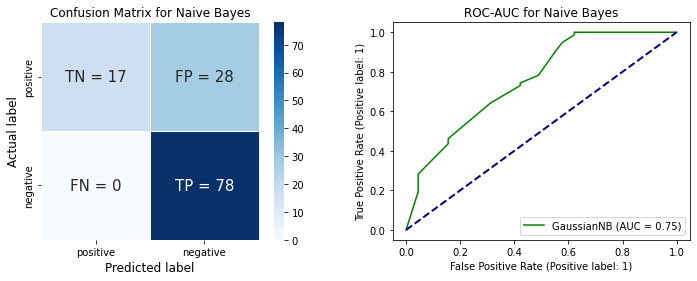

In [91]:
# Confusion Matrix & ROC Curve for Naive Bayes

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.subplots_adjust(wspace=0.25)

sns.heatmap(nb_cm_best, annot=best_nb_cm,
            fmt="",
            annot_kws={"size": 15},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            ax = ax1,
            xticklabels = ['positive', 'negative'],
            yticklabels = ['positive', 'negative'],
            );

ax1.set_ylabel('Actual label', fontsize = 12);
ax1.set_xlabel('Predicted label', fontsize = 12);
ax1.set_title('Confusion Matrix for Naive Bayes')

metrics.plot_roc_curve(best_nb, X_test, y_test, color='green', ax=ax2) 
ax2.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
ax2.set_title('ROC-AUC for Naive Bayes')
roc_auc_score(y_test, best_nb.predict_proba(X_test)[:, 1])

###  ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

0.7408831908831909
0.7027065527065527
0.7548433048433049


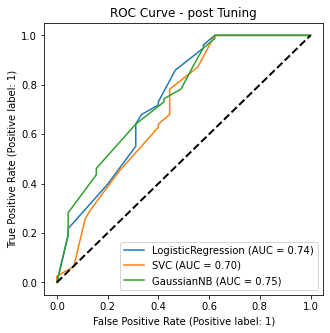

In [92]:
plt.figure(figsize=(5,5))
ax=plt.subplot(111)
plot_roc_curve(best_lr, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(best_svc, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(best_nb, X_test, y_test, ax=ax)
plt.plot([0, 1], [0, 1], color = 'black', lw = 2, linestyle = '--')
plt.title("ROC Curve - post Tuning")

print(roc_auc_score(y_test, grid_lr.predict_proba(X_test)[:, 1]))
print(roc_auc_score(y_test, grid_svc.predict_proba(X_test)[:, 1]))
print(roc_auc_score(y_test, grid_nb.predict_proba(X_test)[:, 1]))

#### Confusion Matrices for all Models:

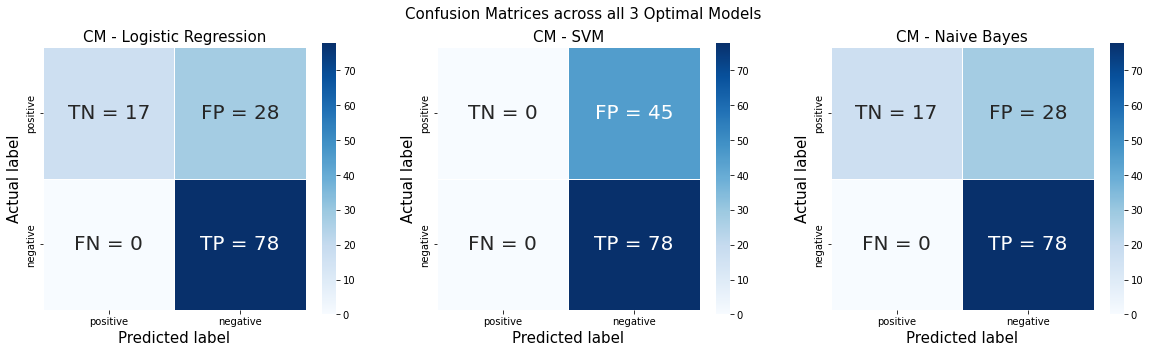

In [93]:
ffig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.subplots_adjust(wspace=0.01)
plt.suptitle('Confusion Matrices across all 3 Optimal Models', fontsize = 15) 

sns.heatmap(lr_cm_best, annot=best_lr_cm, fmt="", annot_kws={"size": 20}, linewidths=.5, 
            square = True, cmap = 'Blues', ax=ax1, xticklabels = ['positive', 'negative'],
            yticklabels = ['positive', 'negative'])
ax1.set_ylabel('Actual label', fontsize = 15);
ax1.set_xlabel('Predicted label', fontsize = 15);
ax1.set_title('CM - Logistic Regression', fontsize = 15);

sns.heatmap(svc_cm_best, annot=best_svc_cm, fmt="", annot_kws={"size": 20}, linewidths=.5, 
            square = True, cmap = 'Blues', ax=ax2, xticklabels = ['positive', 'negative'],
            yticklabels = ['positive', 'negative'])
ax2.set_ylabel('Actual label', fontsize = 15);
ax2.set_xlabel('Predicted label', fontsize = 15);
ax2.set_title('CM - SVM', fontsize = 15);

sns.heatmap(nb_cm_best, annot=best_nb_cm, fmt="", annot_kws={"size": 20}, linewidths=.5, 
            square = True, cmap = 'Blues', ax=ax3, xticklabels = ['positive', 'negative'],
            yticklabels = ['positive', 'negative'])
ax3.set_ylabel('Actual label', fontsize = 15);
ax3.set_xlabel('Predicted label', fontsize = 15);
ax3.set_title('CM - Naive Bayes', fontsize = 15);

In [94]:
# CROSS VALIDATION SCORES - APPLY to TRAIN ONLY & TUNING HYPERPARAMETERS
from sklearn.model_selection import cross_val_score

print(cross_val_score(best_lr, X_train, y_train, cv=10))
print(cross_val_score(best_lr, X_train, y_train, cv=10).mean())

print(cross_val_score(best_svc, X_train, y_train, cv=10))
print(cross_val_score(best_svc, X_train, y_train, cv=10).mean())

print(cross_val_score(best_nb, X_train, y_train, cv=10))
print(cross_val_score(best_nb, X_train, y_train, cv=10).mean())

[0.82       0.83673469 0.79591837 0.79591837 0.7755102  0.87755102
 0.79591837 0.7755102  0.89795918 0.81632653]
0.8187346938775508
[0.7        0.71428571 0.71428571 0.71428571 0.69387755 0.69387755
 0.69387755 0.69387755 0.69387755 0.69387755]
0.7006122448979593
[0.82       0.83673469 0.79591837 0.79591837 0.7755102  0.87755102
 0.79591837 0.7755102  0.89795918 0.81632653]
0.8187346938775508


In [95]:
best_mods = [best_lr, best_svc, best_nb]
fitted = [mod.fit(X_train,y_train) for mod in best_mods]

model_df = pd.DataFrame({'Model': [type(i).__name__ for i in fitted]})

In [96]:
model_df

,Model
0,LogisticRegression
1,SVC
2,GaussianNB


In [97]:
# Confirm the parameter of optimal models
print(best_lr)
print(best_svc)
print(best_nb)

LogisticRegression(C=1)
SVC(C=0.1, gamma=0.0001, probability=True)
GaussianNB(var_smoothing=0.008111308307896872)


In [98]:
Training_Accuracy_score = []
Test_Accuracy_score = []
Precision_score = []
Recall_score = []
F1_score = []
AUC_score = []

for mod in best_mods:
    train_accuracy = accuracy_score(y_train, mod.predict(X_train))
    test_accuracy = accuracy_score(y_test, mod.predict(X_test))
    precision = precision_score(y_test, mod.predict(X_test))
    recall = recall_score(y_test, mod.predict(X_test))
    f1 = f1_score(y_test, mod.predict(X_test))
    auc = roc_auc_score(y_test, mod.predict_proba(X_test)[:, 1])
     
    Training_Accuracy_score.append(train_accuracy)
    Test_Accuracy_score.append(test_accuracy)
    Precision_score.append(precision)
    Recall_score.append(recall)
    F1_score.append(f1)    
    AUC_score.append(auc)

In [99]:
# create columns in dataframe

model_df['Train Accuracy'] = Training_Accuracy_score
model_df['Test Accuracy'] = Test_Accuracy_score
model_df['Precision'] = Precision_score
model_df['Recall'] = Recall_score
model_df['F1'] = F1_score
model_df['AUC'] = AUC_score

# print dataframe
model_df = model_df.round(decimals = 4)
model_df

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1,AUC
0,LogisticRegression,0.8187,0.7724,0.7358,1.0,0.8478,0.7409
1,SVC,0.7006,0.6341,0.6341,1.0,0.7761,0.7027
2,GaussianNB,0.8187,0.7724,0.7358,1.0,0.8478,0.7548


In [100]:
base_model_df

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1,AUC
0,LogisticRegression,0.8187,0.7724,0.7358,1.0,0.8478,0.7409
1,SVC,0.8187,0.7724,0.7358,1.0,0.8478,0.6845
2,GaussianNB,0.8187,0.7724,0.7358,1.0,0.8478,0.7548


Text(0.5, 0.98, 'Metric Score across all 3 Models (Post Tuning)')

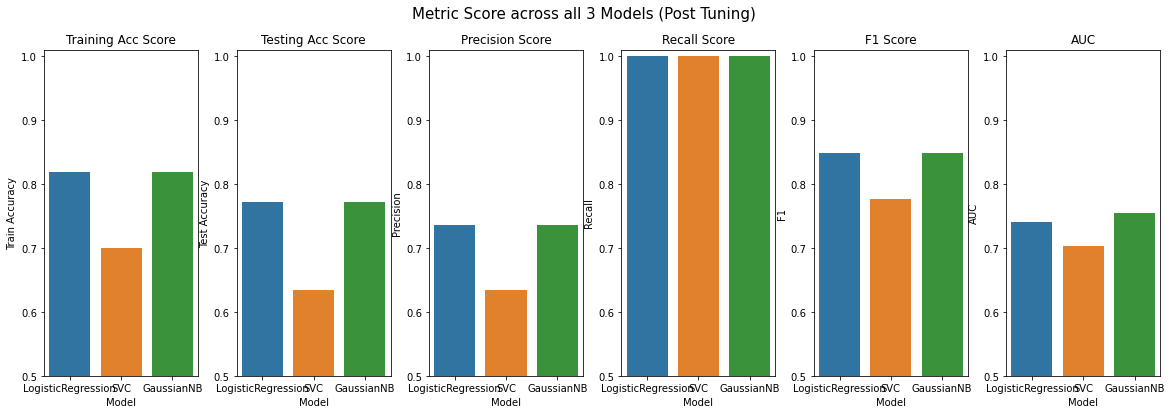

In [101]:
# Data Visualisation 

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(20,6))
fig.subplots_adjust(wspace=0.25)

# Accuracy
sns.barplot(data=model_df, x='Model', y='Train Accuracy',ax=ax1)
sns.barplot(data=model_df, x='Model', y='Test Accuracy',ax=ax2)
sns.barplot(data=model_df, x='Model', y='Precision',ax=ax3)
sns.barplot(data=model_df, x='Model', y='Recall',ax=ax4)
sns.barplot(data=model_df, x='Model', y='F1',ax=ax5)
sns.barplot(data=model_df, x='Model', y='AUC',ax=ax6)
ax1.set_title('Training Acc Score', fontsize=12)
ax2.set_title('Testing Acc Score', fontsize=12)
ax3.set_title('Precision Score', fontsize=12)
ax4.set_title('Recall Score', fontsize=12)
ax5.set_title('F1 Score', fontsize=12)
ax6.set_title('AUC', fontsize=12)
ax1.set(ylim=(0.5, 1.01))
ax2.set(ylim=(0.5, 1.01))
ax3.set(ylim=(0.5, 1.01))
ax4.set(ylim=(0.5, 1.01))
ax5.set(ylim=(0.5, 1.01))
ax6.set(ylim=(0.5, 1.01))

plt.suptitle('Metric Score across all 3 Models (Post Tuning)', fontsize = 15) 

In [102]:
# LEARNING CURVES OF THE MODELS

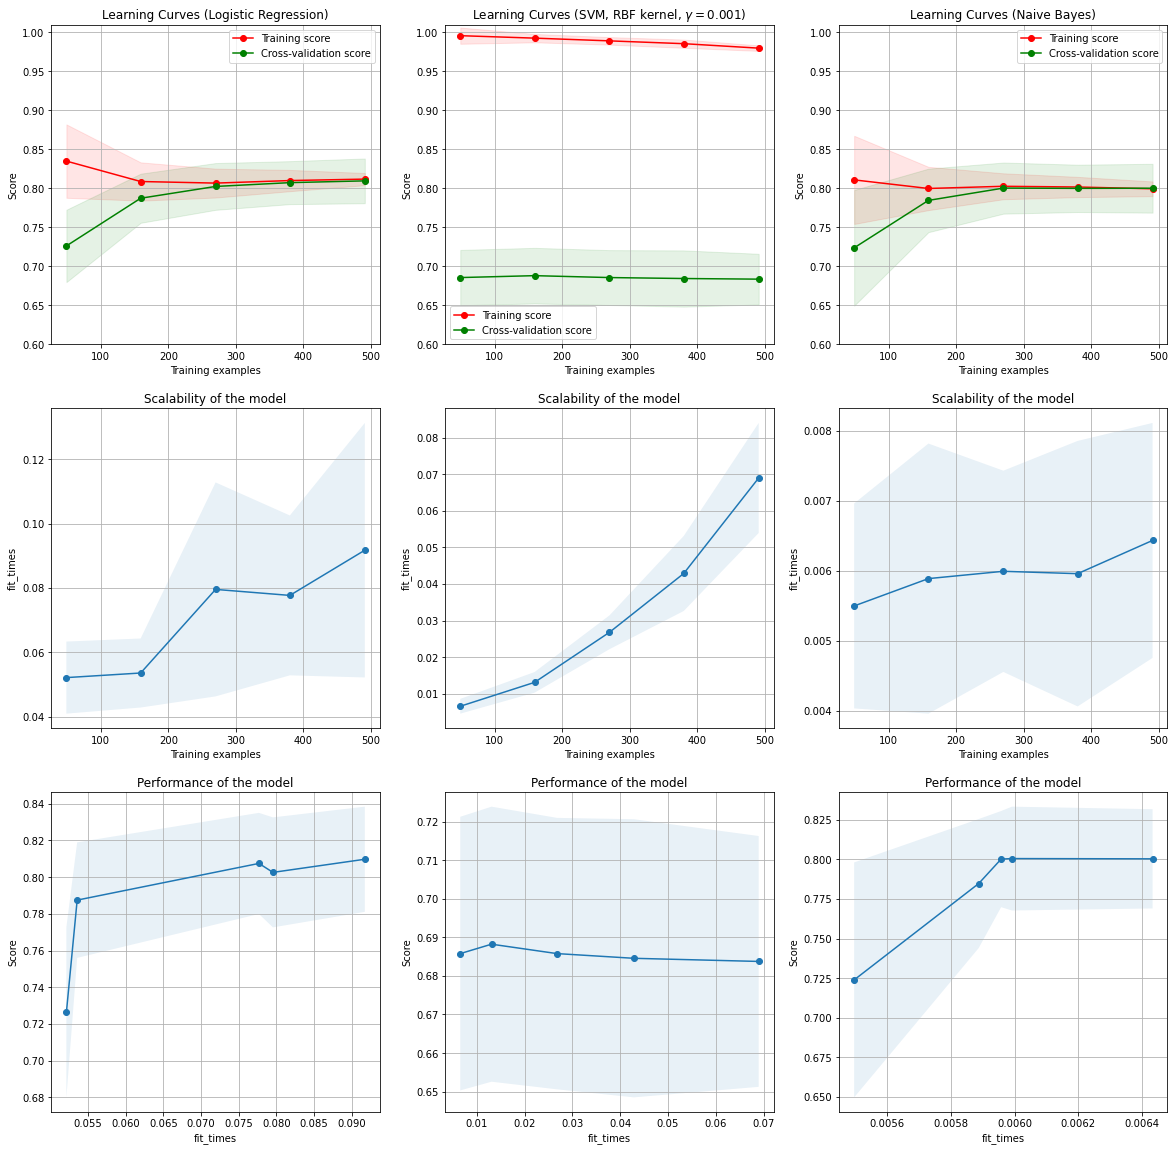

In [103]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 3, figsize=(20,20))

title = "Learning Curves (Logistic Regression)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 0], ylim=(0.6, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
estimator = svm.SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 1], ylim=(0.6, 1.01), cv=cv, n_jobs=4
)

title = "Learning Curves (Naive Bayes)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 2], ylim=(0.6, 1.01), cv=cv, n_jobs=4
)

plt.show()